In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import pathlib
import missingno as msno

Load data 

In [3]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [6]:
print(os.path.abspath(os.path.join(os.getcwd(), '../Scripts')))

c:\Imane_BENZEGUNINE\project\Logistic_Anlalysis_project\Scripts


In [7]:
from paths import PATH_DATA_CSV

In [8]:
data= pd.read_csv(PATH_DATA_CSV) 

In [9]:
data

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [10]:
print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

In [11]:
data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

<Axes: >

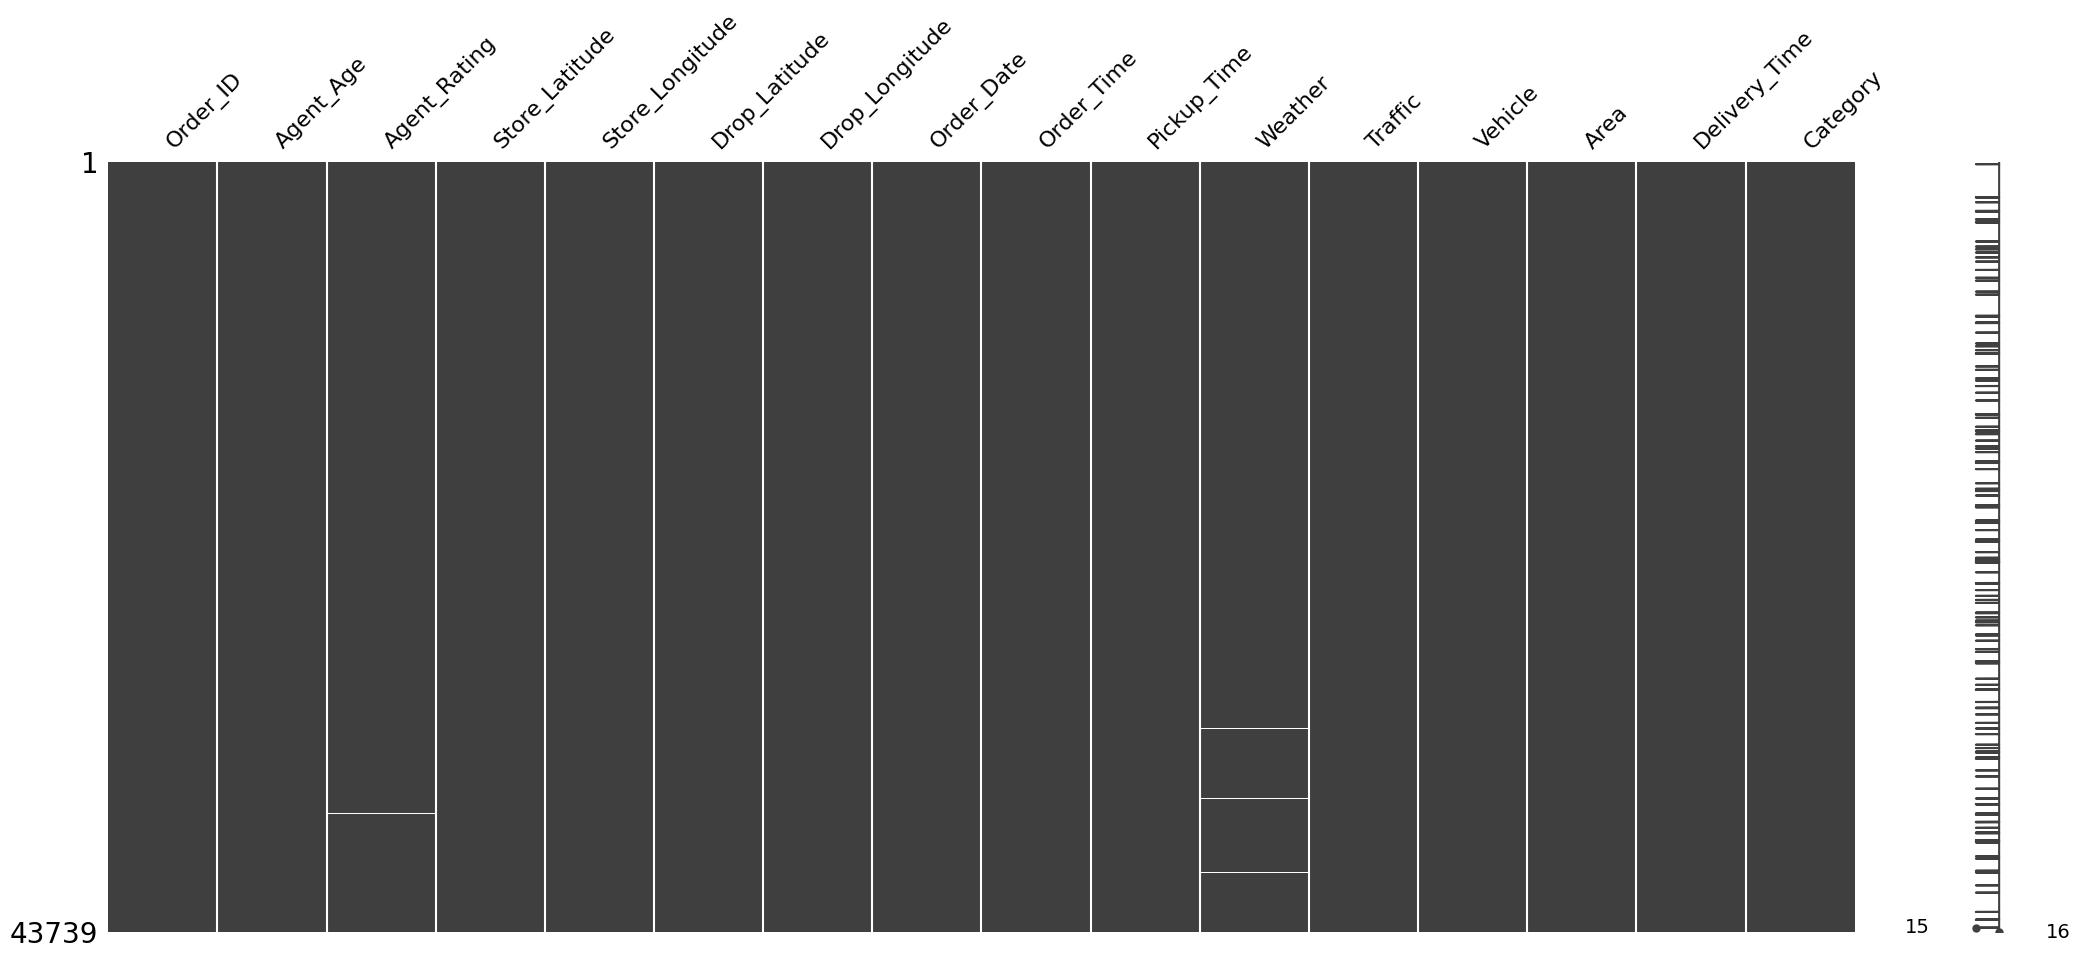

In [16]:
msno.matrix(data)

### Data Cleaning Steps

In [49]:
unique_=data['Weather'].unique()
unique_

['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy']
Categories (6, object): ['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']

In [48]:
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
data=data.apply(lambda col:fillna(col))

In [52]:
data.isna().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

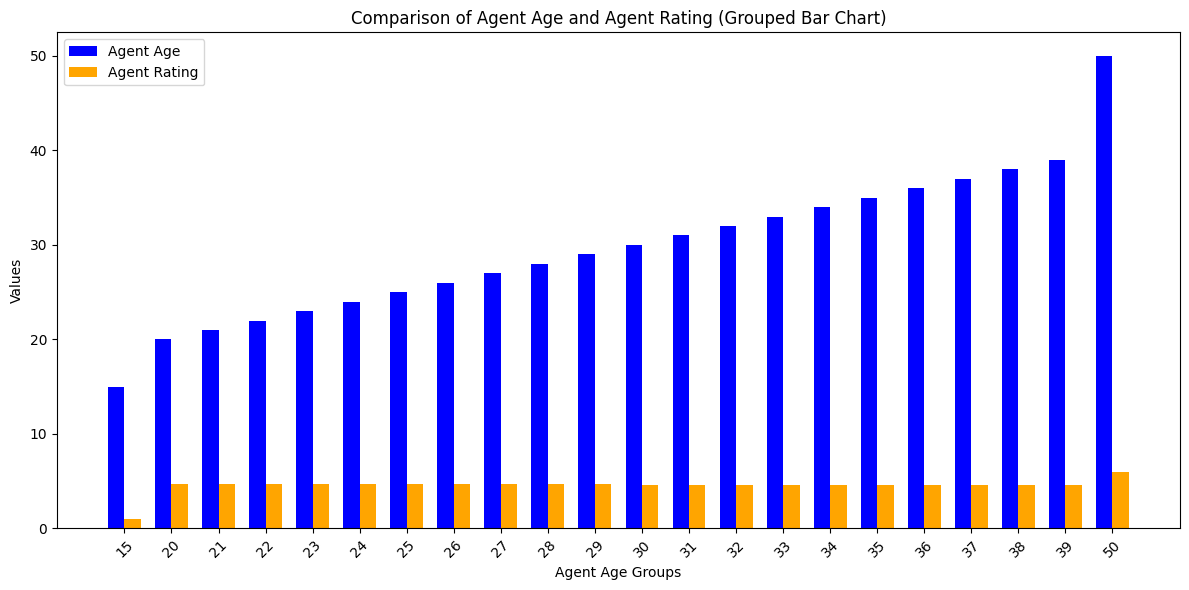

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame with columns 'Agent_Age' and 'Agent_Rating'
# Example data (replace this with your actual data loading)
# data = pd.read_csv('your_data.csv')  # Load your dataset

# Group the data by 'Agent_Age' and calculate the mean 'Agent_Rating' for each age group
grouped_data = data.groupby('Agent_Age')['Agent_Rating'].mean().reset_index()

# Create the bar chart
x = np.arange(len(grouped_data))  # X-axis positions for the bars
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))  # Set the figure size

# Plot bars for Agent_Age and Agent_Rating
plt.bar(x - width/2, grouped_data['Agent_Age'], width, label="Agent Age", color='blue')
plt.bar(x + width/2, grouped_data['Agent_Rating'], width, label="Agent Rating", color='orange')

# Add labels, title, and legend
plt.xlabel("Agent Age Groups")
plt.ylabel("Values")
plt.title("Comparison of Agent Age and Agent Rating (Grouped Bar Chart)")
plt.xticks(x, grouped_data['Agent_Age'], rotation=45)  # Set x-axis labels to Agent_Age
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

save data

In [63]:
save_path = os.path.abspath(os.path.join(os.getcwd(), '../data/clean_data.csv'))
sys.path.append(save_path)

In [60]:
print(save_path)

c:\Imane_BENZEGUNINE\project\Logistic_Anlalysis_project\data


In [ ]:
data.to_csv(save_path)  